Suppose an appliance store conducts a 5-month experiment to determine the effect of advertising on sales revenue. The results are shown below.
Advertising Expenditure $x$ (hundreds of dollars) 1 2 3 4 5
Sales Revenue $y$ (thousands of dollars) 1 1 2 2 4

(a) Draw a scatterplot of the data and comment the relationship between y and x.

In [30]:
import matplotlib.pyplot as plt

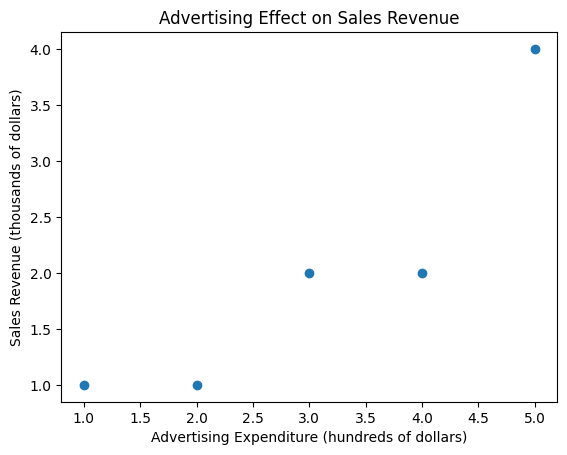

In [31]:
x=[1,2,3,4,5]
y=[1,1,2,2,4]
plt.scatter(x,y)
plt.xlabel('Advertising Expenditure (hundreds of dollars)')
plt.ylabel('Sales Revenue (thousands of dollars)')
plt.title('Advertising Effect on Sales Revenue')
plt.show() 

as  we can see from the scatter plot, there is a positive linear relationship between advertising expenditure and sales revenue.

(b) What is your linear regression model? State the necessary assumptions.


The linear regression model is:

$y_{i} = \beta_0 + \beta_1 x_{i} + \epsilon_{i}$

where $\beta_0$ is the intercept and $\beta_1$ is the slope.

The necessary assumptions for linear regression are:

1. $\epsilon_i \sim \mathcal{N}(\mu, \sigma^2)$
2. The errors are independent of each other.


(c)  Find the least squares line from the data and plot it on your scatterplot.


we can calculate the parameters using the following formulas:
$\beta_1 = \frac{n \sum (x_i y_i) - \sum x_i \sum y_i}{n \sum (x_i^2) - (\sum x_i)^2}$
$\beta_0 = \bar{y} - \beta_1 \bar{x}$

In [32]:
from scipy.stats import linregress
import numpy as np

In [33]:
def sum_of_array(x):
    ans = 0
    for i in x:
        ans += i
    return ans

In [34]:
def sum_of_squares(x):
    ans = 0
    for i in x:
        ans += i**2
    return ans

In [35]:
def sum_of_xy( x , y):
    ans = 0
    for i in range(len(x)):
        ans += x[i] * y[i]
    return ans

In [36]:
Sxy=(len(x) * sum_of_xy(x, y) - sum_of_array(x) * sum_of_array(y))
Sxx=(len(x) * sum_of_squares(x) - sum_of_array(x)**2)
def cal_beta1():
    ans=  Sxy/ Sxx
    return ans


In [37]:
def cal_beta0(x, y):
    ans = sum_of_array(y) / len(x) - cal_beta1() * sum_of_array(x) / len(x)      
    # print(f"beta0 = { ans}")
    return ans

slope: 0.7
intercept: -0.10000000000000009


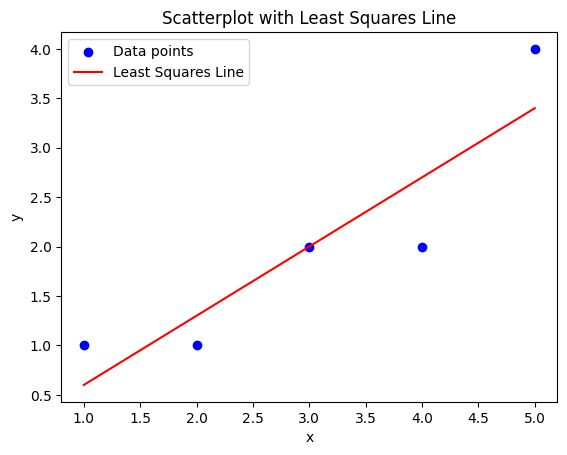

In [38]:
slope = cal_beta1()
intercept = cal_beta0(x, y)
print('slope:', slope)
print('intercept:', intercept)
plt.scatter(x, y, color='blue', label='Data points')
regression_line = slope * np.array(x) + intercept
plt.plot(x, regression_line, color='red', label='Least Squares Line')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatterplot with Least Squares Line')
plt.legend()
plt.show()

(d) Test the hypothesis that the Advertising Expenditure has no effect of the Sales
Revenue when a linear model is used (use α = 0.05). State the null and alternative
hypotheses. Draw the appropriate test conclusions.


for β1:
H0 : β1 = 0 
H1 : β1 ≠= 0
Test statistic:
$
t = \frac{\hat{\beta}_1 - \beta_1}{S / S_{xx}^{1/2}} \sim t_{n-2} \text{ if } H_0 \text{ is true }
$
Decision rule: reject $ H_0 $ if $ |t| > t_{\alpha/2, n-2} $.

In [39]:
t_value = (slope - 0) / (np.sqrt(Sxy / Sxx))#t(0.05, 4)=2.7764
print('t-value:', t_value)


t-value: 0.8366600265340755


because $t_{\alpha/2, n-2} = 2.7764$,t-value: 0.8366600265340755,$ |t| < t_{\alpha/2, n-2} $ we  not reject $ H_0 $ 

(e) Find a 95% confidence interval for β1 (slope of the linear regression model). Interpret
your results.

the 95% confidence interval for β1 is:

$
\hat{\beta}_1 \pm t_{\alpha/2, n-2} S / S_{xx}^{1/2}
$

where $t_{\alpha/2, n-2}$ is the t-value corresponding to the 95% confidence level.

$\hat{\beta}_1 = 0.7$

The estimator of $ \sigma^2 $ is given by:

$
S^2 = MSE = \frac{SSE}{n - 2} = \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{n - 2}
$

Here, $ S^2 $ is an unbiased estimator of $ \sigma^2 $.


In [40]:
y_ave= np.average(y)/len(y)
y_eva=[intercept + slope*x[i] for i in range(len(x))]
S=sum((y[i]-y_eva[i])**2 for i in range(len(x)))/(len(x)-2)
CI=(slope - 2.7764 *S/ np.sqrt(Sxx), slope + 2.7764*S / np.sqrt(Sxx))
print('95% confidence interval for β1:', CI) 

95% confidence interval for β1: (0.5560311737323358, 0.8439688262676641)


because $β1=0.7 \sim  (0.5560311737323358, 0.8439688262676641)$ so we can say that the effect of advertising expenditure on sales revenue is significant at 95% confidence level.

(f) Find the coefficient of determination for the linear regression model. Interpret your
result.

The coefficient of determination, or $ R^2 $, is defined as
$
R^2 = \frac{SSR}{SST} = 1 - \frac{SSE}{SST}
$
$
SST = \sum_{i=1}^{n} (y_i - \bar{y})^2 = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 + \sum_{i=1}^{n} (\hat{y}_i - \bar{y})^2 = SSE + SSR
$

In [41]:

SSE=sum([(y[i]-y_eva[i])**2 for i in range(len(x))])
SSR=sum([(y_eva[i]-y_ave)**2 for i in range(len(x))])
SST=SSE+SSR
R2=1-SSE/SST
print('R2:', R2)

R2: 0.9414893617021277


because $R^2=0.9414$ so we can say that the linear regression model explains 94.14% of the variation in the data.

(g) Find a prediction for the mean Sales Revenue when 4 hundreds dollars are spent on
advertising and its 95% interval. What is the 95% interval for the Sales Revenue?


The two-sided $ 100(1 - \alpha)\% $ confidence interval for $ \hat{y}_h $ is given by:

$
\hat{y}_h - t_{\alpha/2,n-2} S \sqrt{1 + \frac{1}{n} + \frac{(x_h - \bar{x})^2}{\sum_{i}(x_i - \bar{x})^2}}, \quad \hat{y}_h + t_{\alpha/2,n-2} S \sqrt{1 + \frac{1}{n} + \frac{(x_h - \bar{x})^2}{\sum_{i}(x_i - \bar{x})^2}}
$


In [42]:
y_head=intercept + slope*4
print('y_head:', y_head)
t_alpha=2.7764
ans=(y_head - t_alpha * S * np.sqrt(1 + 1/len(x) + (4-np.average(x))**2/sum_of_squares(x-np.average(x))), y_head + t_alpha * S * np.sqrt(1 + 1/len(x) + (4-np.average(x))**2/sum_of_squares(x-np.average(x))))
print('average sales revenue:', ans)

y_head: 2.6999999999999997
average sales revenue: (1.5392862149100763, 3.8607137850899234)


2. (20 marks)
(a) Define a simple linear regression model and derive MLE (maximum likelihood estimation) for all the unknown parameters



(a) Assume $y_i = \beta_0 + \beta_1 x_i + \varepsilon_i$, where $\varepsilon_i \sim N(0, \sigma^2), i = 1, 2, \ldots, n$ and error terms are mutually independent. $y_i \sim N(\beta_0 + \beta_1 x_i, \sigma^2)$, where $\beta_0, \beta_1$ and $\sigma^2$ are unknown.

The likelihood function is

$
L(\beta_0, \beta_1, \sigma^2) = \frac{1}{(\sqrt{2\pi\sigma^2})^n} \exp \left( -\frac{\sum_{i=1}^n (y_i - \beta_0 - \beta_1 x_i)^2}{2\sigma^2} \right)
$

and the  log-likelihood function is 

$
\begin{align*}
\ell(\beta_0, \beta_1, \sigma^2) &= -\frac{1}{2\sigma^2} \sum_{i=1}^n (y_i - \beta_0 - \beta_1 x_i)^2 \\
&\quad - \frac{n}{2}\ln(2\pi\sigma^2)
\end{align*}
$

where

$
\begin{align*}
\frac{\partial \ell(\beta_0, \beta_1, \sigma^2)}{\partial \beta_0} &= \sum_{i=1}^n \frac{y_i - \beta_0 - \beta_1 x_i}{\sigma^2}, \\
\frac{\partial \ell(\beta_0, \beta_1, \sigma^2)}{\partial \beta_1} &= \sum_{i=1}^n \frac{(y_i - \beta_0 - \beta_1 x_i)x_i}{\sigma^2}, \\
\frac{\partial \ell(\beta_0, \beta_1, \sigma^2)}{\partial \sigma^2} &= \frac{1}{2\sigma^4} \sum_{i=1}^n (y_i - \beta_0 - \beta_1 x_i)^2 - \frac{n}{2\sigma^2}
\end{align*}
$

Let

$
\frac{\partial \ell(\beta_0, \beta_1, \sigma^2)}{\partial \beta_0} = 0
$

and get

$
\beta_0 = \overline{y} - \beta_1 \overline{x}
$

so that

$
\frac{\partial \ell(\beta_0, \beta_1, \sigma^2)}{\partial \beta_1} = \sum_{i=1}^n \frac{x_i(y_i - \overline{y}) + \beta_1 x_i (\overline{x} - x_i)}{\sigma^2}
$

Let

$
\frac{\partial \ell(\beta_0, \beta_1, \sigma^2)}{\partial \beta_1} = 0
$

and  the MLE of $\beta_1$ is 

$
\hat{\beta}_1 = \frac{\sum_{i=1}^n x_i (y_i - \overline{y})}{\sum_{i=1}^n x_i (x_i - \overline{x})} = \frac{\sum_{i=1}^n (x_i - \overline{x})(y_i - \overline{y})}{\sum_{i=1}^n (x_i - \overline{x})^2}
$

 the MLE of $\beta_0$ is 

$
\hat{\beta}_0 = \overline{y} - \hat{\beta}_1 \overline{x} = \hat{y} - \frac{\sum_{i=1}^n x_i (x_i - y)}{\sum_{i=1}^n x_i (x_i - \overline{x})}
$

Let 

$
\frac{\partial \ell(\beta_0, \beta_1, \sigma^2)}{\partial \sigma^2} = 0
$

and get the MLE of $\sigma^2$ is 

$
\hat{\sigma}^2 = \frac{\sum_{i=1}^n (y_i - \hat{y}_i)^2}{n}
$

where 

$
\hat{y}_i = \hat{\beta}_0 + \hat{\beta}_1 x_i
$



(b) Comments on the difference between MLE and LSE (least square estimation)





The main difference between Maximum Likelihood Estimation (MLE) and Least Squares Estimation (LSE) is that MLE estimates parameters by maximizing the likelihood function to make the observed data most probable, whereas LSE estimates parameters by minimizing the sum of squared differences between observed and predicted values, typically used in linear regression; additionally, MLE is generally sensitive to model assumptions, while LSE can perform poorly in the presence of outliers.